## Estimativa de pessoas internadas por um ou mais dias com sintomas de Covid

In [8]:
import basedosdados as bd

In [9]:
query = """
WITH pop as (
    SELECT 
        sigla_uf,
        SUM(v1032) as populacao
    FROM `basedosdados.br_ibge_pnad_covid.microdados`
    WHERE mes = 11
    GROUP BY 1
)
SELECT 
    covid.sigla_uf,
    pop.populacao,
    sum(covid.v1032) as n_internados,
    100000 * sum(covid.v1032) / sum(pop.populacao) AS n_internados_100mil_hab 
FROM `basedosdados.br_ibge_pnad_covid.microdados` as covid
INNER JOIN pop
ON covid.sigla_uf = pop.sigla_uf
WHERE covid.b005 = "2"
GROUP BY 1, 2;"""

# Variável PNAD Covid:
# v1032: Peso mensal com correção de não entrevista com pós estratificação pela projeção de população
# b005: Ao procurar o hospital, teve que ficar internado por um dia ou mais => b005 = 2: Sim

df_covid = bd.read_sql(query, billing_project_id="basedosdados")

Downloading: 100%|██████████| 27/27 [00:01<00:00, 21.27rows/s]


In [2]:
import geobr

In [7]:
states = geobr.read_state(code_state="all", year=2020)
states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   code_state    27 non-null     float64 
 1   abbrev_state  27 non-null     object  
 2   name_state    27 non-null     object  
 3   code_region   27 non-null     float64 
 4   name_region   27 non-null     object  
 5   geometry      27 non-null     geometry
dtypes: float64(2), geometry(1), object(3)
memory usage: 1.4+ KB


In [12]:
states = states.merge(df_covid, left_on="abbrev_state", right_on="sigla_uf")
states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   code_state               27 non-null     float64 
 1   abbrev_state             27 non-null     object  
 2   name_state               27 non-null     object  
 3   code_region              27 non-null     float64 
 4   name_region              27 non-null     object  
 5   geometry                 27 non-null     geometry
 6   sigla_uf                 27 non-null     object  
 7   populacao                27 non-null     float64 
 8   n_internados             27 non-null     float64 
 9   n_internados_100mil_hab  27 non-null     float64 
dtypes: float64(5), geometry(1), object(4)
memory usage: 2.3+ KB


In [21]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from mpl_toolkits.axes_grid1 import make_axes_locatable
# ! pip install -U mapclassify

In [52]:
import numpy as np

In [54]:
states[["sigla_uf", "n_internados_100mil_hab"]].sort_values("n_internados_100mil_hab")

,sigla_uf,n_internados_100mil_hab
16,MG,3.114579
19,SP,3.219622
18,RJ,3.411326
21,SC,4.648461
22,RS,5.159421
20,PR,5.325428
7,MA,5.393012
15,BA,6.178438
9,CE,6.334774
12,PE,6.579344


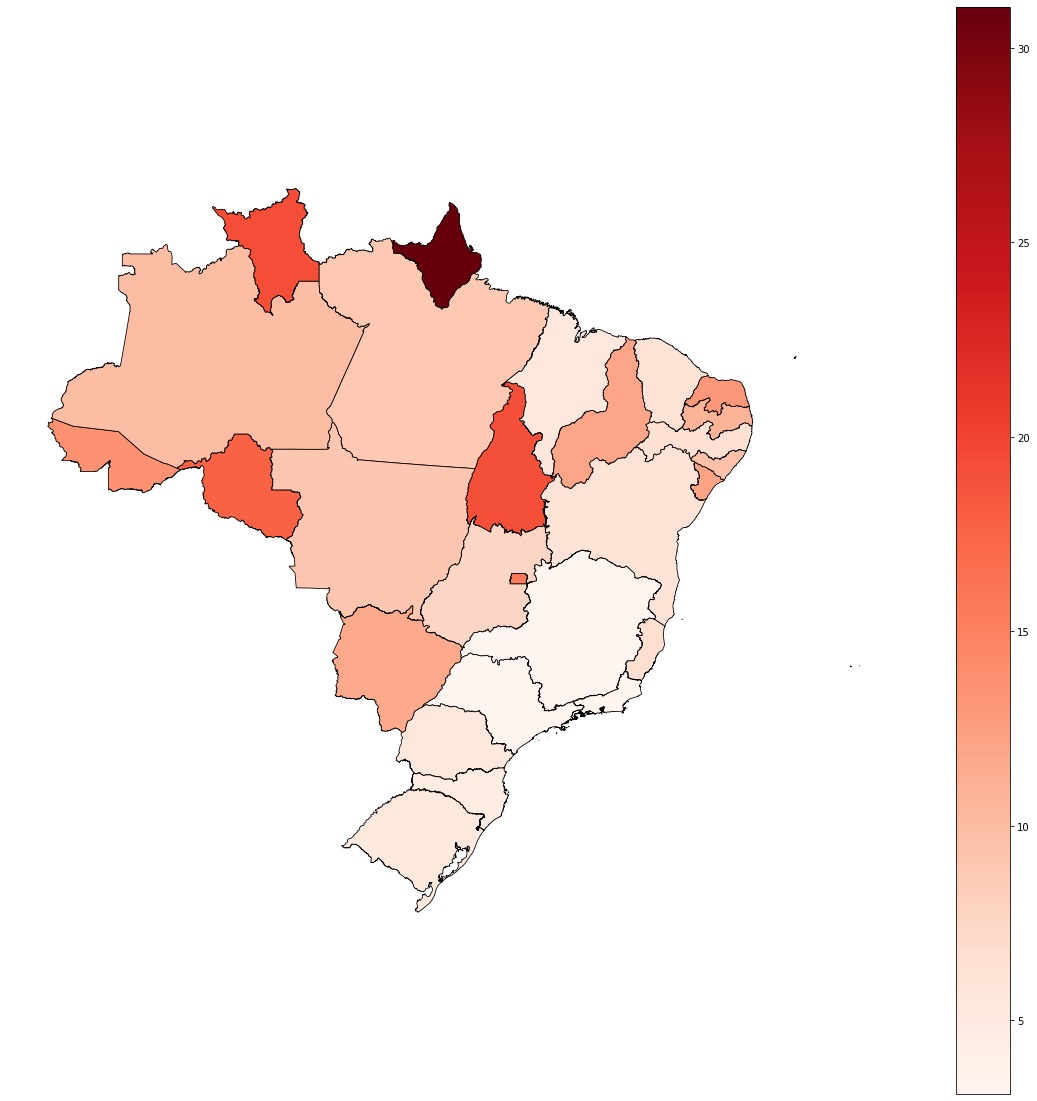

In [75]:
var = 'n_internados_100mil_hab'

fig = plt.figure(figsize=(20,20))
ax = plt.subplot(1,1,1)

states.plot(
    column=var,
    ax=ax,
    legend=True,
    cmap="Reds",
    edgecolor='#000000',
    linewidth = 0.8
)

ax.axis('off')
plt.savefig('br_ibge_pnad_covid_internados.png', transparent=True, bbox_inches = 'tight', pad_inches = 0)